In [280]:
import pandas as pd
import matplotlib.pyplot as plt

In [281]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [282]:
df.shape

(65437, 114)

In [283]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [284]:
df = df.rename({'ConvertedCompYearly':'Salary'}, axis = 1)
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'Salary', 'JobSat'],
      dtype='object', length=114)

In [285]:
df['Salary'].notnull().sum()

23435

So only 23435 people have submitted salary

In [286]:
df = df[df['Salary'].notnull()]
df.shape

(23435, 114)

In [287]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'Salary', 'JobSat'],
      dtype='object', length=114)

In [288]:
types = df['Country'].value_counts()
types

Country
United States of America                                4677
Germany                                                 2046
Ukraine                                                 1474
United Kingdom of Great Britain and Northern Ireland    1391
India                                                   1037
                                                        ... 
Togo                                                       1
Central African Republic                                   1
Sudan                                                      1
Oman                                                       1
Haiti                                                      1
Name: count, Length: 166, dtype: int64

In [289]:
print(type(types))

<class 'pandas.core.series.Series'>


In [290]:
cutoff = 400
def divide_types(types, cutoff):
    categories = {}
    categories["Others"] = 0
    for index, val in types.items():
        if(val>=cutoff):
            categories[index] = val
        else:
            categories["Others"]+=val
    return categories

categories = divide_types(types, cutoff)
print(categories)
 

{'Others': 7123, 'United States of America': 4677, 'Germany': 2046, 'Ukraine': 1474, 'United Kingdom of Great Britain and Northern Ireland': 1391, 'India': 1037, 'France': 918, 'Canada': 871, 'Brazil': 685, 'Poland': 586, 'Netherlands': 561, 'Spain': 559, 'Italy': 540, 'Australia': 510, 'Sweden': 457}


In [291]:
df['Country'] = df['Country'].apply(lambda x: x if x in categories else 'Others')
df['Country'].value_counts()

Country
Others                                                  7123
United States of America                                4677
Germany                                                 2046
Ukraine                                                 1474
United Kingdom of Great Britain and Northern Ireland    1391
India                                                   1037
France                                                   918
Canada                                                   871
Brazil                                                   685
Poland                                                   586
Netherlands                                              561
Spain                                                    559
Italy                                                    540
Australia                                                510
Sweden                                                   457
Name: count, dtype: int64

In [292]:
df = df[['Country','EdLevel','YearsCodePro','Employment','Salary']]
df

,Country,EdLevel,YearsCodePro,Employment,Salary
72,Others,"Secondary school (e.g. American high school, G...",1,"Employed, full-time;Student, full-time;Indepen...",7322.0
374,Others,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,"Employed, full-time",30074.0
379,Others,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",91295.0
385,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17,"Independent contractor, freelancer, or self-em...",53703.0
389,United States of America,Some college/university study without earning ...,7,"Employed, full-time;Student, part-time",110000.0
...,...,...,...,...,...
41180,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",3,"Employed, full-time",44640.0
41184,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",30,"Employed, full-time",170000.0
41185,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",15,"Employed, full-time",116844.0
41186,United States of America,Some college/university study without earning ...,1,"Student, full-time;Employed, part-time",12000.0


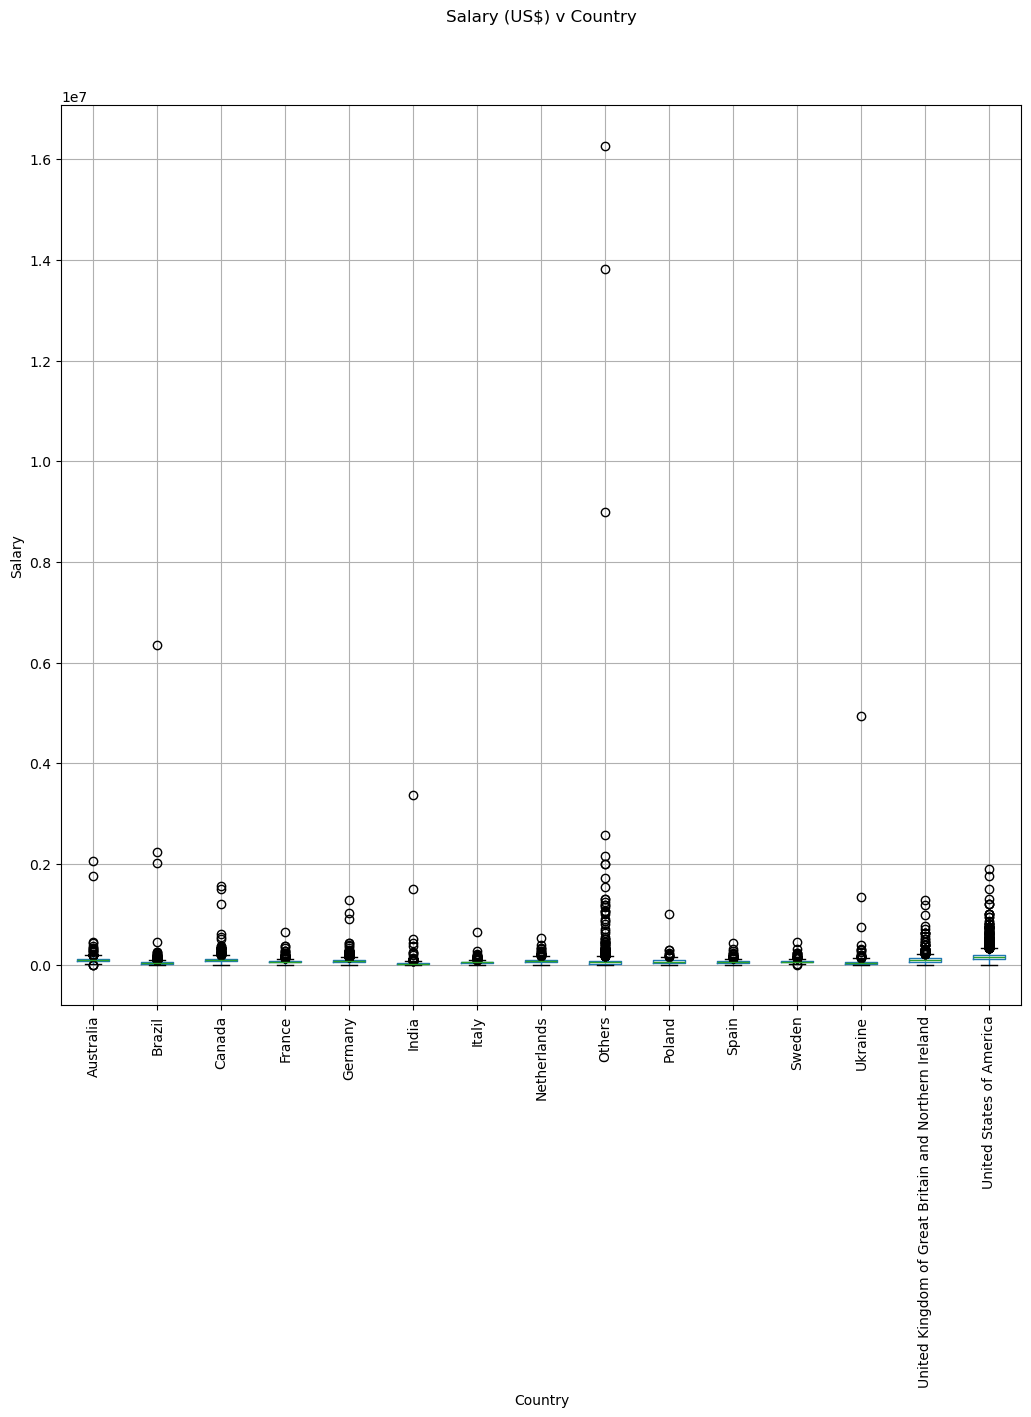

In [293]:
fig, ax = plt.subplots(figsize=(12, 12))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [294]:
df.YearsCodePro.unique()
df.shape

(23435, 5)

In [295]:
df.dropna(inplace = True)

In [296]:
df.YearsCodePro.unique()

array(['1', '6', '17', '7', '18', '25', '30', '20', '50', '27', '16', '4',
       '15', '11', '23', '10', '9', '8', '24', '12', '26', '40',
       'Less than 1 year', '14', '22', '5', '28', '3', '44', '42', '13',
       '19', '2', '35', '31', '41', '36', '38', '32', '34', '21',
       'More than 50 years', '29', '45', '43', '37', '33', '48', '39',
       '46', '49', '47'], dtype=object)

In [297]:
def correct_exp(x):
    if x == 'Less than 1 year':
        return 0.5
    if x == 'More than 50 years':
        return 50
    else:
        return float(x)
df.YearsCodePro = df.YearsCodePro.apply(correct_exp)

In [298]:
df.EdLevel.unique()

array(['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Primary/elementary school',
       'Something else'], dtype=object)

In [299]:
def correct_Education(x):
    if 'Master’s degree' in x:
        return 'Master degree'
    if 'Bachelor’s degree' in x:
        return 'Bachelor degree'
    if 'Professional degree' in x:
        return 'Professional degree'
    else:
        return 'Less than a Bachelor'
df.EdLevel = df.EdLevel.apply(correct_Education)
df.EdLevel.unique()

array(['Less than a Bachelor', 'Professional degree', 'Master degree',
       'Bachelor degree'], dtype=object)

In [300]:
df

,Country,EdLevel,YearsCodePro,Employment,Salary
72,Others,Less than a Bachelor,1.0,"Employed, full-time;Student, full-time;Indepen...",7322.0
374,Others,Professional degree,6.0,"Employed, full-time",30074.0
379,Others,Master degree,6.0,"Employed, full-time",91295.0
385,France,Master degree,17.0,"Independent contractor, freelancer, or self-em...",53703.0
389,United States of America,Less than a Bachelor,7.0,"Employed, full-time;Student, part-time",110000.0
...,...,...,...,...,...
41180,Sweden,Master degree,3.0,"Employed, full-time",44640.0
41184,United States of America,Master degree,30.0,"Employed, full-time",170000.0
41185,United States of America,Bachelor degree,15.0,"Employed, full-time",116844.0
41186,United States of America,Less than a Bachelor,1.0,"Student, full-time;Employed, part-time",12000.0


In [301]:
df.drop(['Employment'], axis = 1)

,Country,EdLevel,YearsCodePro,Salary
72,Others,Less than a Bachelor,1.0,7322.0
374,Others,Professional degree,6.0,30074.0
379,Others,Master degree,6.0,91295.0
385,France,Master degree,17.0,53703.0
389,United States of America,Less than a Bachelor,7.0,110000.0
...,...,...,...,...
41180,Sweden,Master degree,3.0,44640.0
41184,United States of America,Master degree,30.0,170000.0
41185,United States of America,Bachelor degree,15.0,116844.0
41186,United States of America,Less than a Bachelor,1.0,12000.0


In [302]:
from sklearn.preprocessing import LabelEncoder

In [303]:
le = LabelEncoder()
df.EdLevel = le.fit_transform(df.EdLevel)
df

,Country,EdLevel,YearsCodePro,Employment,Salary
72,Others,1,1.0,"Employed, full-time;Student, full-time;Indepen...",7322.0
374,Others,3,6.0,"Employed, full-time",30074.0
379,Others,2,6.0,"Employed, full-time",91295.0
385,France,2,17.0,"Independent contractor, freelancer, or self-em...",53703.0
389,United States of America,1,7.0,"Employed, full-time;Student, part-time",110000.0
...,...,...,...,...,...
41180,Sweden,2,3.0,"Employed, full-time",44640.0
41184,United States of America,2,30.0,"Employed, full-time",170000.0
41185,United States of America,0,15.0,"Employed, full-time",116844.0
41186,United States of America,1,1.0,"Student, full-time;Employed, part-time",12000.0


In [304]:
Country_converter = LabelEncoder()
df.Country = Country_converter.fit_transform(df.Country)
df.drop(['Employment'], inplace = True, axis = 1)
df

,Country,EdLevel,YearsCodePro,Salary
72,8,1,1.0,7322.0
374,8,3,6.0,30074.0
379,8,2,6.0,91295.0
385,3,2,17.0,53703.0
389,14,1,7.0,110000.0
...,...,...,...,...
41180,11,2,3.0,44640.0
41184,14,2,30.0,170000.0
41185,14,0,15.0,116844.0
41186,14,1,1.0,12000.0


Data Cleaning is Over, Now we will start modelling the data

In [305]:
X = df.iloc[:,:-1]
y = df.Salary

In [306]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)

In [307]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
error1 = root_mean_squared_error(y,y_pred)
error2 = mean_absolute_error(y, y_pred)
(error1, error2)

(183720.11524039367, 49306.29151130656)

In [308]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X,y)
y_pred = dt.predict(X)
dt_error = root_mean_squared_error(y, y_pred)
dt_error

175165.17078224302

In [309]:
from sklearn.svm import SVR
sv = SVR()
sv.fit(X,y)
sv_error = root_mean_squared_error(y, sv.predict(X))
sv_error

187678.6068215567

In [310]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X, y)
rfr_error = root_mean_squared_error(y, random_forest_reg.predict(X))
rfr_error

175369.0256268426

In [311]:
from sklearn.model_selection import GridSearchCV
max_depth = [None,2,4,5,6,7,8,10,12,14]
parameters = {"max_depth": max_depth}
regressor = DecisionTreeRegressor()
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X,y)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 2, 4, 5, 6, 7, 8, 10, 12, 14]},
             scoring='neg_mean_squared_error')

In [312]:
regressor = gs.best_estimator_
regressor.fit(X,y)
y_pred = regressor.predict(X)
final_error = root_mean_squared_error(y,y_pred)
final_error

180927.7544144087

In [313]:
import numpy as np

In [314]:
X

,Country,EdLevel,YearsCodePro
72,8,1,1.0
374,8,3,6.0
379,8,2,6.0
385,3,2,17.0
389,14,1,7.0
...,...,...,...
41180,11,2,3.0
41184,14,2,30.0
41185,14,0,15.0
41186,14,1,1.0


In [315]:
X = np.array([['United States of America', 'Master degree', 2]])
X

array([['United States of America', 'Master degree', '2']], dtype='<U24')

In [316]:
le.classes_

array(['Bachelor degree', 'Less than a Bachelor', 'Master degree',
       'Professional degree'], dtype=object)

In [317]:
Country_converter.classes_

array(['Australia', 'Brazil', 'Canada', 'France', 'Germany', 'India',
       'Italy', 'Netherlands', 'Others', 'Poland', 'Spain', 'Sweden',
       'Ukraine', 'United Kingdom of Great Britain and Northern Ireland',
       'United States of America'], dtype=object)

In [318]:
X[:, 0] = Country_converter.transform(X[:, 0])  # Encode the Country
X[:, 1] = le.transform(X[:, 1])  # Encode the EdLevel
X

array([['14', '2', '2']], dtype='<U24')

In [319]:
y_pred = regressor.predict(X)
y_pred

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([79037.32275132])

In [320]:
import pickle

In [322]:
data = {"model": regressor, "le_country": Country_converter, "le_education": le}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [323]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [324]:
y_pred = regressor_loaded.predict(X)
y_pred

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([79037.32275132])